# CNN Dog vs Cat

https://www.kaggle.com/karakaggle/kaggle-cat-vs-dog-dataset

In [1]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pushpit19jain","key":"b7c5f470a3b48f2bdcf9577295307ba6"}'}

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

100% 785M/787M [00:11<00:00, 60.6MB/s]
100% 787M/787M [00:11<00:00, 72.9MB/s]


In [ ]:
!unzip /content/kaggle-cat-vs-dog-dataset.zip

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from keras.preprocessing import image

In [21]:
path = "/content/kagglecatsanddogs_3367a/PetImages/"
X = []
Y = []

In [15]:
for folder in os.listdir(path):
  print(folder)
  print(path+folder)
  #for img in os.listdir(path+folder):
  #  print(img)   # print every image in each folder


Cat
/content/kagglecatsanddogs_3367a/PetImages/Cat
Dog
/content/kagglecatsanddogs_3367a/PetImages/Dog


Storing images from the folders in X and the name of animal (label) in Y

In [22]:
def prep (path, label):
  img = image.load_img (path, target_size=(100,100))   # this is from keras.prep
        # target means whatever the size of image, bring it and make it 100x100
  img = image.img_to_array(img)
  X.append(img)
  Y.append(label)


In [25]:
for folder in os.listdir(path):
  for img in tqdm(os.listdir(path+folder)):
    final_path = path+folder+"/"+img
    if final_path.endswith(("jpg", "png")):
      prep(final_path , folder)


100%|██████████| 12491/12491 [00:30<00:00, 411.02it/s]

 90%|████████▉ | 11203/12470 [00:28<00:03, 388.17it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-pa

In [26]:
len(X), len(Y)

(24959, 24959)

In [27]:
# converting to numpy array
X = np.array(X)
Y = np.array(Y)

X.shape, Y.shape

((24959, 100, 100, 3), (24959,))

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.25)

In [30]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape 

((18719, 100, 100, 3), (6240, 100, 100, 3), (18719,), (6240,))

In [31]:
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
ytest = le_y.fit_transform(ytest)
ytrain = le_y.transform(ytrain)

## NN

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

Can try multiple things

conv -> m pool -> conv -> m pool -> Flatten -> output

conv -> conv -> m pool -> Flatten -> output

etc

In [37]:
clf1 = Sequential()

In [38]:
# first layer
# CONV1
clf1.add(Conv2D(filters=64,
                kernel_size=(3,3),
                strides=(2,2),
                activation="relu",
                input_shape=(100,100,3)
                ))

In [39]:
# Mpool 1
clf1.add(MaxPool2D(pool_size=(2,2)))

In [40]:
# CONV2 MPOOL2
clf1.add(Conv2D(filters=32,
                kernel_size=(3,3),
                strides=(2,2),
                activation="relu",
                input_shape=(100,100,3)
                ))
clf1.add(MaxPool2D(pool_size=(2,2)))

In [41]:
# Flatten
clf1.add(Flatten())

In [42]:
# NN
clf1.add(Dense(16, activation="relu"))

In [43]:
# Output
clf1.add(Dense(1, activation="sigmoid"))

In [44]:
# compiling
clf1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [45]:
clf1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 49, 49, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12816     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

Total params: 33,089 for 25k imgs, for normal NN it would have been huge

In [46]:
clf1.fit(xtrain, ytrain, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
132/132 [==============================] - 46s 27ms/step - loss: 4.8621 - accuracy: 0.5155 - val_loss: 0.6939 - val_accuracy: 0.5123
Epoch 2/20
132/132 [==============================] - 3s 23ms/step - loss: 0.6929 - accuracy: 0.4997 - val_loss: 0.6891 - val_accuracy: 0.5369
Epoch 3/20
132/132 [==============================] - 3s 23ms/step - loss: 0.6876 - accuracy: 0.5456 - val_loss: 0.6750 - val_accuracy: 0.5860
Epoch 4/20
132/132 [==============================] - 3s 23ms/step - loss: 0.6760 - accuracy: 0.5787 - val_loss: 0.6665 - val_accuracy: 0.6127
Epoch 5/20
132/132 [==============================] - 3s 23ms/step - loss: 0.6654 - accuracy: 0.6092 - val_loss: 0.6541 - val_accuracy: 0.6400
Epoch 6/20
132/132 [==============================] - 3s 23ms/step - loss: 0.6485 - accuracy: 0.6416 - val_loss: 0.6260 - val_accuracy: 0.6790
Epoch 7/20
132/132 [==============================] - 3s 23ms/step - loss: 0.6380 - accuracy: 0.6616 - val_loss: 0.6403 - val_accuracy: 0.640

81% and 75%

In [47]:
clf2 = Sequential()

clf2.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(100,100,3)))
clf2.add(MaxPool2D(pool_size=(2,2)))

clf2.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(100,100,3)))
clf2.add(MaxPool2D(pool_size=(2,2)))

clf2.add(Flatten())

clf2.add(Dense(16, activation="relu"))
clf2.add(Dense(1, activation="sigmoid"))

clf2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print(clf2.summary())

clf2.fit(xtrain, ytrain, batch_size=128, epochs=20, validation_split=0.1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                541712    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

50.2% and 48.82%

In [48]:
# C C P C C P F D O
clf3 = Sequential()

clf3.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(100,100,3)))
clf3.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(100,100,3)))
clf3.add(MaxPool2D(pool_size=(2,2)))

clf3.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(100,100,3)))
clf3.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(100,100,3)))
clf3.add(MaxPool2D(pool_size=(2,2)))

clf3.add(Flatten())

clf3.add(Dense(128, activation="relu"))
clf3.add(Dense(1, activation="sigmoid"))

clf3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print(clf3.summary())

clf3.fit(xtrain, ytrain, batch_size=128, epochs=20, validation_split=0.1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 44, 44, 16)        4624      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)             

99% vs 73% is overfitting

In [50]:
# C C P Dr C C P Dr F D O
clf4 = Sequential()

clf4.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(100,100,3)))
clf4.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(100,100,3)))
clf4.add(MaxPool2D(pool_size=(2,2)))
clf4.add(Dropout(rate=0.3))

clf4.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(100,100,3)))
clf4.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation="relu",input_shape=(100,100,3)))
clf4.add(MaxPool2D(pool_size=(2,2)))
clf4.add(Dropout(rate=0.3))

clf4.add(Flatten())

clf4.add(Dense(128, activation="relu"))
clf4.add(Dense(1, activation="sigmoid"))

clf4.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print(clf4.summary())

clf4.fit(xtrain, ytrain, batch_size=256, epochs=20, validation_split=0.1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 44, 44, 16)        4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 16)       

67% and 69%

In [53]:
# C C P Dr C C P Dr F D O
clf5 = Sequential()

clf5.add(Conv2D(32, (3,3), activation="relu", input_shape=(100,100,3)))
clf5.add(Conv2D(32, (5,5), activation="relu", input_shape=(100,100,3)))
clf5.add(MaxPool2D(pool_size=(2,2)))
clf5.add(Dropout(rate=0.25))

clf5.add(Conv2D(32, (3,3), activation="relu", input_shape=(100,100,3)))
clf5.add(Conv2D(16, (5,5), activation="relu", input_shape=(100,100,3)))
clf5.add(MaxPool2D(pool_size=(2,2)))
clf5.add(Dropout(rate=0.25))

clf5.add(Flatten())

clf5.add(Dense(64, activation="relu"))
clf5.add(Dense(1, activation="sigmoid"))

clf5.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print(clf5.summary())

clf5.fit(xtrain, ytrain, batch_size=128, epochs=20, validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 94, 94, 32)        25632     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 45, 45, 32)        9248      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 41, 41, 16)        12816     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 20, 20, 16)       

In [54]:
print(clf5.evaluate(xtest, ytest))
print(clf5.evaluate(xtrain, ytrain))

pred5 = clf5.predict(xtest)
pred5 = pred5 >= 0.5 
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(pred5, ytest))

print(classification_report(ytest, pred5))
# IG dogs are complex

195/195 [==============================] - 2s 7ms/step - loss: 0.6861 - accuracy: 0.6987
[0.6860694289207458, 0.6987179517745972]
585/585 [==============================] - 4s 8ms/step - loss: 0.3495 - accuracy: 0.8608
[0.34945541620254517, 0.8608365654945374]
[[2392 1169]
 [ 711 1968]]
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      3103
           1       0.73      0.63      0.68      3137

    accuracy                           0.70      6240
   macro avg       0.70      0.70      0.70      6240
weighted avg       0.70      0.70      0.70      6240



if run just the .fit(epochs) command, then it will start from 20 as same model

75 % on validation is considered good on CNN

In [61]:
# C C P Dr C C P Dr F D O
clf6 = Sequential()

clf6.add(Conv2D(64, (3,3),  strides=(2,2), activation="relu", input_shape=(100,100,3)))
clf6.add(Conv2D(32, (5,5),  activation="relu", input_shape=(100,100,3)))
clf6.add(MaxPool2D(pool_size=(2,2)))
clf6.add(Dropout(rate=0.25))

clf6.add(Conv2D(32, (3,3), strides=(2,2), activation="relu", input_shape=(100,100,3)))
clf6.add(Conv2D(16, (5,5), strides=(2,2), activation="relu", input_shape=(100,100,3)))
clf6.add(MaxPool2D(pool_size=(2,2)))
clf6.add(Dropout(rate=0.25))

clf6.add(Flatten())

clf6.add(Dense(64, activation="relu"))
clf6.add(Dense(1, activation="sigmoid"))

clf6.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print(clf6.summary())

clf6.fit(xtrain, ytrain, batch_size=128, epochs=20, validation_split=0.2)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 49, 49, 64)        1792      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 45, 45, 32)        51232     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 3, 3, 16)          12816     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 16)        

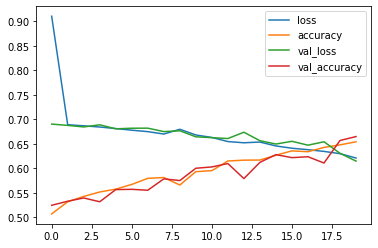

In [62]:
pd.DataFrame(clf6.history.history).plot()
plt.show()